In [2]:
# importing required libraries
import obspy as ob
import wget
import math
from itertools import permutations
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

In [3]:
# Function to calculate permutation entropy

def permuentropy(dta,m,L):
# data = dta
# embedding dimension of the time series = m
# time delay used for embedding = L

#If the user wants to find complexity variations in a time series
#it is recommended that m > 3 and m < 8, while the length of data
#should be > 5*m!

    # length of the data vector = dta_len
    dta_len = len(dta)
    # number of vectors in embedding space
    no_vector = dta_len - (m-1)*L
    # estimate factorial of m
    mm = math.factorial(m)
    # list of all permutations
    permlist = list(permutations(np.arange(0,m,1)))
    # creating dictionary of all permutations
    permdict={}
    for i in range(0,mm):
        permdict[str(permlist[i][:])] = i
    #print(permdict)
    # initialize pattern of permutations and other temp vectors to 0
    c = np.zeros((mm,1))
    # loop over number of vectors
    for i in range(0,no_vector):
        #continue
        idx = np.arange(i,i+m*L,L)
        # find coordimates of each point in m-space
        a = dta[idx]
        # sort co-ordinates in ascending order
        iv = np.argsort(a)
        # search dictionary for pattern and get the pattern index
        srchkey = str(tuple(iv))
        if srchkey in permdict:
            jj = permdict[srchkey]
        c[jj] = c[jj] + 1

    # calculate the relative frequency of c
    c = c/no_vector;
    pe = 0;
    # sum up and estimate permutation entropy
    pe = sum(-c[c!=0] * np.log(c[c!=0]))
    # alternate
        #for k in range(0,mm):
        #    if c[k] != 0:
        #        pe = pe - c[k]*(math.log(c[k]))
    
    # normalize permutation entropy by ln(m!)
    pe = pe/(math.log(mm))
    
    return pe,c

In [4]:
url='https://taps.earth.sinica.edu.tw/rfi/seed/RCEC7B/TW-RCEC7A_10-BNX.mseed'
#df = wget.download(url) # downloading the data from the url

In [5]:
ob

<module 'obspy' from '/home/user/anaconda2/envs/obspy/lib/python3.7/site-packages/obspy/__init__.py'>

In [6]:
dl = ob.read("/home/user/Rfidget/093_124/RCEC7B/RCEC7.TW.BNX*") # reading the mseed file to an obspy stream object

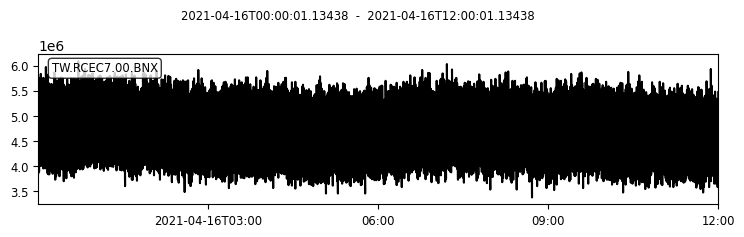

In [23]:
dl = ob.read("/home/user/Rfidget/093_124/RCEC7B/RCEC7.TW.BNX.00.D.2021.106.000001")
dl.plot(starttime=dl[0].stats.starttime,endtime=dl[0].stats.starttime+43200)

In [18]:
tmp = dl[14:15]
fl = tmp.merge(method=1)

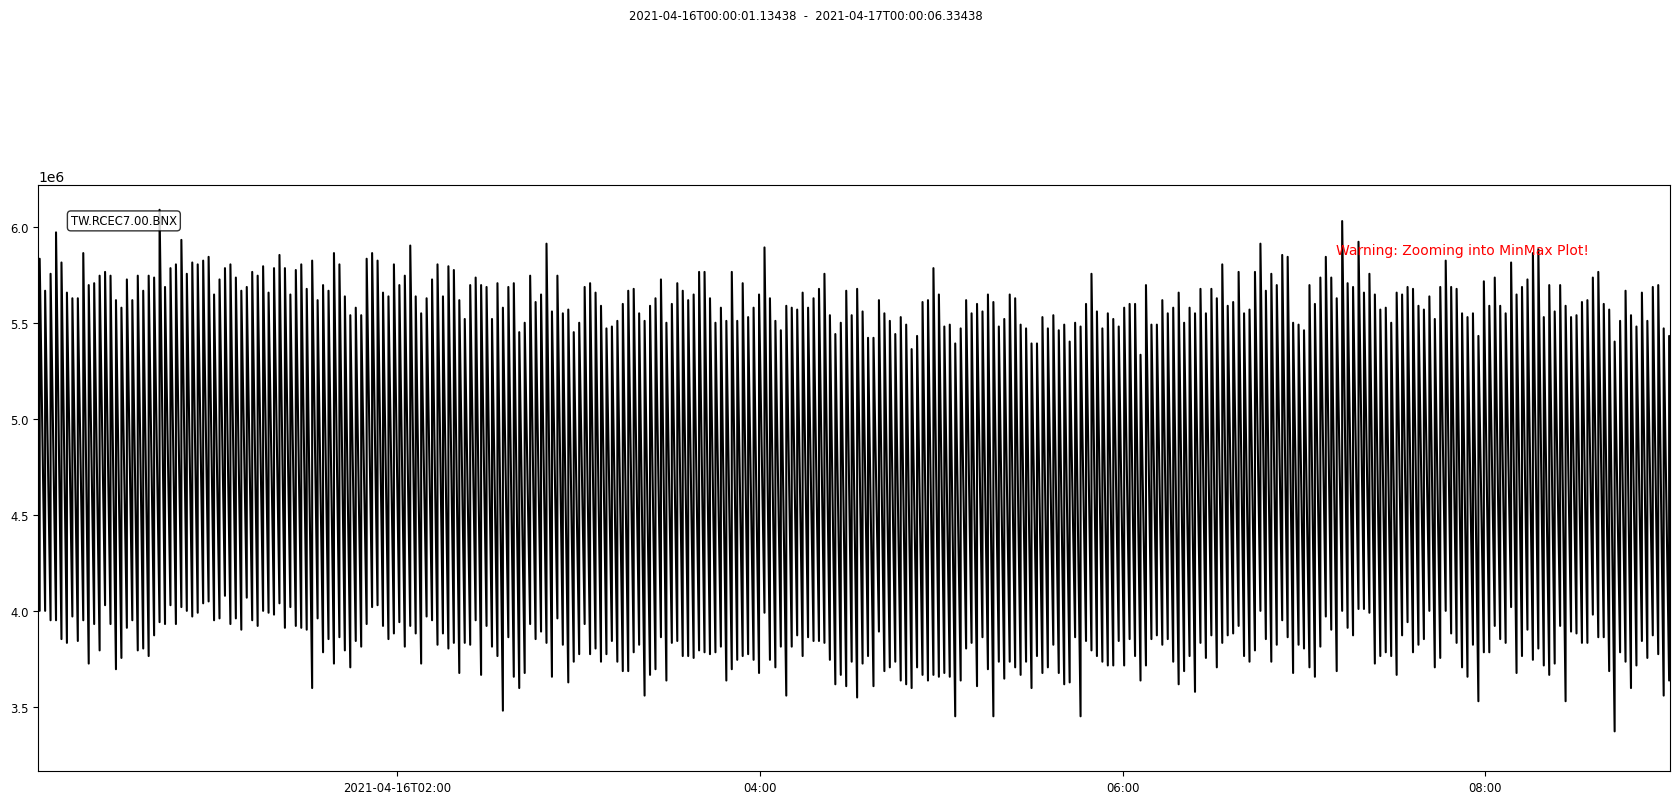

In [20]:
fl[0].plot()

In [9]:
len(fl)

1

In [10]:
for wav_no in range(0,len(fl)):#len(fl)):
    print(fl[wav_no].stats) # Trace stats

    #%matplotlib qt # plotting in a matplotlib window

    # plotting the trace
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(fl[wav_no].times("matplotlib"), fl[wav_no].data, "b-")
#     ax.xaxis_date()
#     fig.autofmt_xdate()
#     plt.show()

    # Deciding the data samples to be used for permutation entropy calculation

    d_time = int(600) # time spacing in seconds between start of each data sample
    l_smpl = int(600) # length of each data sample in seconds
    idx = np.arange(0,fl[wav_no].stats.npts-l_smpl*fl[wav_no].stats.sampling_rate, \
                fl[wav_no].stats.sampling_rate*d_time,dtype='int64') # indexes for permutation entropy calculation
    n_iter = len(idx)
    print(len(idx))

    # permutation entropy calculation
    strt = datetime.now()
    L = 1 # Sample delay used for embedding 
    m = 5 # Embedding dimension
    tmp = fl[wav_no].data # Original data
    pe = np.zeros((n_iter,1)) # Array to store pe values
    time_x = np.empty((n_iter,1),dtype='datetime64[s]') # Array to store time values

    for i in range(0,n_iter):
        dta = tmp[idx[i]:idx[i]+l_smpl*int(fl[wav_no].stats.sampling_rate)] # Creating a data sample
        pe[i],c = permuentropy(dta,m,L) # calculating permutation entropy for the data sample
        time_x[i] = fl[wav_no].stats.starttime + \
        (idx[i]+idx[i]+l_smpl*int(fl[wav_no].stats.sampling_rate)) \
        /(int(fl[wav_no].stats.sampling_rate)*2) # Storing time corresponding to each data sample
    print(datetime.now()-strt) # displaying running time of pe calculations

    # plotting the pe values with time

    %matplotlib qt

    fig, ax = plt.subplots(1,1,figsize=(20,6))
    ax.plot(time_x,pe)
    plt.xlabel('Time in month-date hour format',fontweight='bold',fontsize='14')
    plt.ylabel('Permutation Entropy',fontweight='bold',fontsize='14')
    plt.title(fl[wav_no].stats.station,fontweight='bold',fontsize='18')
    txt='PE_{station:s}_{stmnth:02d}-{stdate:02d}-{sthr:02d}_{ndmnth:02d}-{nddate:02d}-{ndhr:02d}.png'
    plt.savefig(txt.format(station=fl[wav_no].stats.station,stmnth=fl[wav_no].stats.starttime.month, \
                       stdate=fl[wav_no].stats.starttime.day,sthr=fl[wav_no].stats.starttime.hour, \
                       ndmnth=fl[wav_no].stats.endtime.month,nddate=fl[wav_no].stats.endtime.day, \
                       ndhr=fl[wav_no].stats.endtime.hour))

         network: TW
         station: RCEC7
        location: 00
         channel: BNX
       starttime: 2021-04-10T00:00:04.483492Z
         endtime: 2021-04-19T00:00:07.763492Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 38880165
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 8571, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 35106816})
1296
0:20:50.788962


In [13]:
n_iter

4558